# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
pip install citipy

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# practicing with example

# set up lists to hold response info
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
date = []
name = []

# loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        name.append(response['name'])
        print(f"{city} found!")
    
    except:
        print("City not found")
        pass



georgetown found!
cape town found!
City not found
hithadhoo found!
hobart found!
chuy found!
vardo found!
kodiak found!
puerto ayora found!
necochea found!
port alfred found!
kampong thum found!
mataura found!
City not found
punta arenas found!
bluff found!
City not found
vaini found!
tulagi found!
khandyga found!
san patricio found!
rikitea found!
groningen found!
busselton found!
svelgen found!
vityazevo found!
City not found
fortuna found!
limbang found!
sinnamary found!
araci found!
berdigestyakh found!
City not found
furmanov found!
anadyr found!
kavieng found!
City not found
ribeira grande found!
cabo san lucas found!
roald found!
laguna found!
atuona found!
sucre found!
ushuaia found!
butaritari found!
mandurah found!
pevek found!
cap malheureux found!
sobolevo found!
tall kayf found!
namatanai found!
saint-francois found!
belmonte found!
talcahuano found!
arraial do cabo found!
nikolskoye found!
port elizabeth found!
rawson found!
santa rosalia found!
eyl found!
bredasdorp foun

wilmington found!
berlevag found!
asfi found!
kijang found!
altay found!
kaihua found!
lieksa found!
paramonga found!
City not found
City not found
bonthe found!
atar found!
bagotville found!
lompoc found!
yurino found!
andros town found!
alta floresta found!
balabac found!
zhigansk found!
luangwa found!
ornes found!
biak found!
polunochnoye found!
narrabri found!
kasama found!
kambove found!
anori found!
pietersburg found!
mizdah found!
opelika found!
urengoy found!
dakoro found!
City not found
morristown found!
indiana found!
kota found!
talnakh found!
chandur found!
antofagasta found!
klamath falls found!
virginia beach found!
nome found!
miramar found!
nanortalik found!
City not found
City not found
maceio found!
yertsevo found!
mandan found!
City not found
nivala found!
tezu found!
karaton found!
sibu found!
tabuk found!
oistins found!
malanje found!
bitkine found!
mulege found!
praia found!
dawlatabad found!
bageshwar found!
orlik found!
kapuskasing found!
lindi found!
tomislavgr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
weather_dict = {"city": name,
                "lat": lat,
               "lon": lng,
               "max temp": maxtemp,
               "humidity": humidity,
               "cloudiness": cloudiness,
               "wind speed": windspeed,
               "date": date}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("weather_data.csv")

weather_data



,city,lat,lon,max temp,humidity,cloudiness,wind speed,date
0,George Town,5.41,100.34,84.20,88,20,3.36,1591750597
1,Cape Town,-33.93,18.42,59.00,87,75,23.04,1591750597
2,Hithadhoo,-0.60,73.08,83.53,72,100,8.08,1591750597
3,Hobart,-42.88,147.33,52.00,53,75,9.17,1591750500
4,Chui,-33.70,-53.46,52.03,94,0,2.37,1591750597
...,...,...,...,...,...,...,...,...
556,Keminmaa,65.86,24.82,39.20,100,18,5.82,1591750674
557,Kaeo,-35.10,173.78,61.00,3,70,7.00,1591750674
558,Longyearbyen,78.22,15.64,39.20,69,75,6.93,1591750674
559,Rehoboth,-23.32,17.08,52.56,49,0,10.22,1591750674


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
weather_data.describe()

,lat,lon,max temp,humidity,cloudiness,wind speed,date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.959073,18.055330,67.101747,70.196078,50.506239,7.809929,1.591751e+09
std,33.175516,91.501475,13.849107,20.906870,40.520062,5.260089,6.724558e+01
min,-54.800000,-179.170000,29.030000,1.000000,0.000000,0.360000,1.591750e+09
25%,-8.140000,-65.590000,57.040000,57.000000,4.000000,3.800000,1.591751e+09
50%,22.570000,20.800000,68.790000,75.000000,50.000000,6.930000,1.591751e+09
75%,48.760000,100.340000,78.800000,87.000000,90.000000,10.710000,1.591751e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,29.840000,1.591751e+09


In [55]:
#  Get the indices of cities that have humidity over 100%.

weather_data.index[weather_data['humidity']<=100].tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [63]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_data.drop(weather_data.index, inplace=False)

weather_data

,city,lat,lon,max temp,humidity,cloudiness,wind speed,date
0,George Town,5.41,100.34,84.20,88,20,3.36,1591750597
1,Cape Town,-33.93,18.42,59.00,87,75,23.04,1591750597
2,Hithadhoo,-0.60,73.08,83.53,72,100,8.08,1591750597
3,Hobart,-42.88,147.33,52.00,53,75,9.17,1591750500
4,Chui,-33.70,-53.46,52.03,94,0,2.37,1591750597
...,...,...,...,...,...,...,...,...
556,Keminmaa,65.86,24.82,39.20,100,18,5.82,1591750674
557,Kaeo,-35.10,173.78,61.00,3,70,7.00,1591750674
558,Longyearbyen,78.22,15.64,39.20,69,75,6.93,1591750674
559,Rehoboth,-23.32,17.08,52.56,49,0,10.22,1591750674


In [102]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

weather_data.to_csv("weather_data2.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

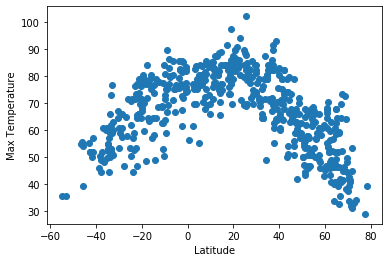

In [66]:
x_value1 = weather_data['lat']
y_value1 = weather_data['max temp']
plt.scatter(x_value1,y_value1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

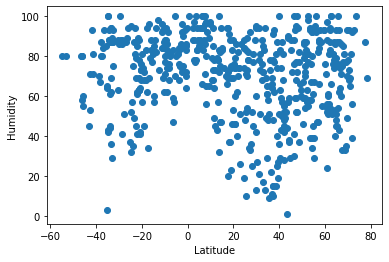

In [67]:
x_value2 = weather_data['lat']
y_value2 = weather_data['humidity']
plt.scatter(x_value2, y_value2)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

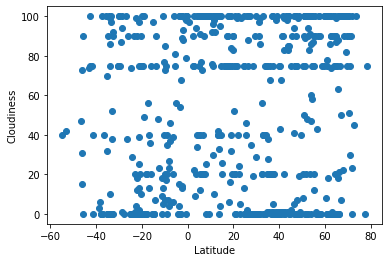

In [68]:
x_value3 = weather_data['lat']
y_value3 = weather_data['cloudiness']
plt.scatter(x_value3, y_value3)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

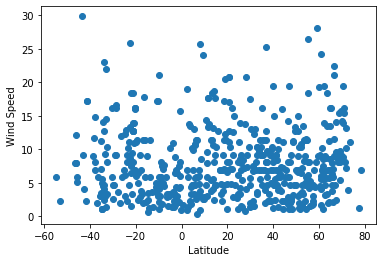

In [70]:
x_value4 = weather_data['lat']
y_value4 = weather_data['wind speed']
plt.scatter(x_value4, y_value4)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [79]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_data[weather_data['lat']>=0]

southern_df = weather_data[weather_data['lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5749264638823738


<function matplotlib.pyplot.show(*args, **kw)>

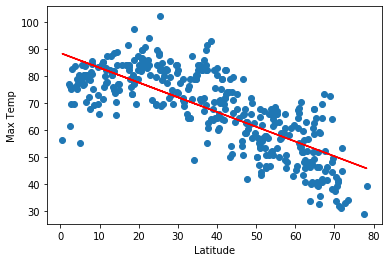

In [85]:
x_value5 = northern_df['lat']
y_value5 = northern_df['max temp']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value5, y_value5)

regress_values1 = x_value5 * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value5, y_value5)
plt.plot(x_value5,regress_values1,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5404782287078118


<function matplotlib.pyplot.show(*args, **kw)>

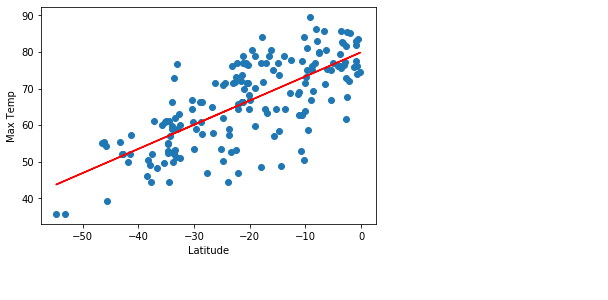

In [89]:
x_value6 = southern_df['lat']
y_value6 = southern_df['max temp']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value6, y_value6)

regress_values2 = x_value6 * slope + intercept

line_eq2 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value6, y_value6)
plt.plot(x_value6,regress_values2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq2,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006561380320939835


<function matplotlib.pyplot.show(*args, **kw)>

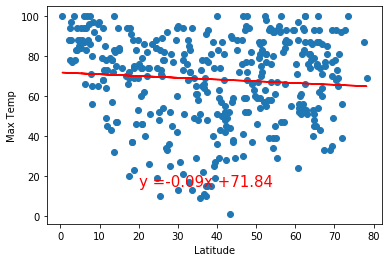

In [91]:
x_value7 = northern_df['lat']
y_value7 = northern_df['humidity']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value7, y_value7)

regress_values3 = x_value7 * slope + intercept

line_eq3 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value7, y_value7)
plt.plot(x_value7,regress_values2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq3,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027806043821697633


<function matplotlib.pyplot.show(*args, **kw)>

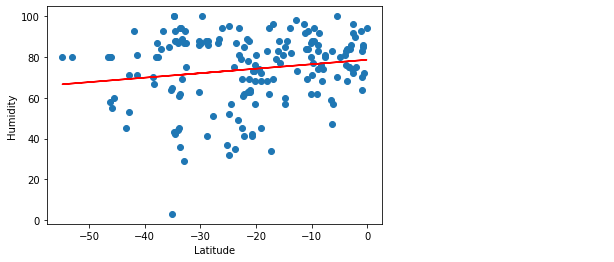

In [92]:
x_value8 = southern_df['lat']
y_value8 = southern_df['humidity']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value8, y_value8)

regress_values4 = x_value8 * slope + intercept

line_eq4 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value8, y_value8)
plt.plot(x_value8,regress_values4,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq4,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00018464540050092772


<function matplotlib.pyplot.show(*args, **kw)>

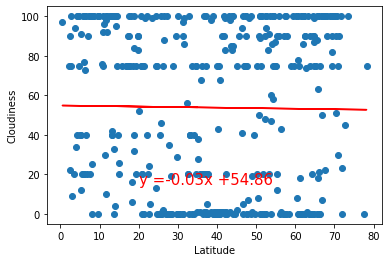

In [94]:
x_value9 = northern_df['lat']
y_value9 = northern_df['cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value9, y_value9)

regress_values5 = x_value9 * slope + intercept

line_eq5 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value9, y_value9)
plt.plot(x_value9,regress_values5,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq5,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003451397994498141


<function matplotlib.pyplot.show(*args, **kw)>

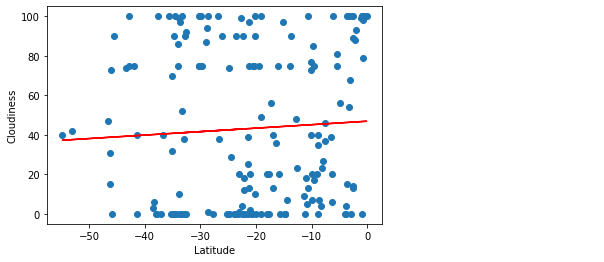

In [95]:
x_value10 = southern_df['lat']
y_value10 = southern_df['cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value10, y_value10)

regress_values6 = x_value10 * slope + intercept

line_eq5 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value10, y_value10)
plt.plot(x_value10,regress_values6,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq5,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000669334570619006


<function matplotlib.pyplot.show(*args, **kw)>

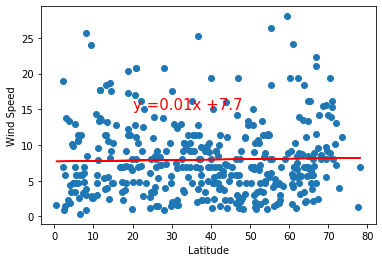

In [96]:
x_value11 = northern_df['lat']
y_value11 = northern_df['wind speed']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value11, y_value11)

regress_values7 = x_value11 * slope + intercept

line_eq6 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value11, y_value11)
plt.plot(x_value11,regress_values7,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq6,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04397041173918581


<function matplotlib.pyplot.show(*args, **kw)>

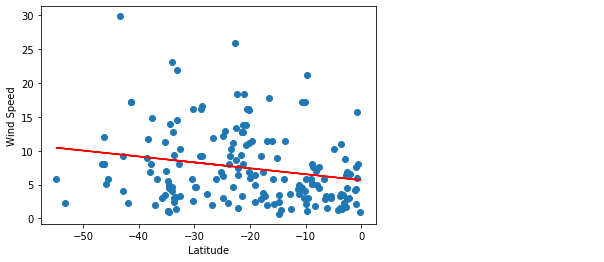

In [97]:
x_value12 = southern_df['lat']
y_value12 = southern_df['wind speed']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value12, y_value12)

regress_values8 = x_value12 * slope + intercept

line_eq7 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value12, y_value12)
plt.plot(x_value12,regress_values8,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq7,(20,15), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show

Final Analysis of Part I

As we posited at the beginning of this challenge, temperatures do get warmer as you get closer to the equator. You can see this relationship very clearly in the figure that compares Max Temperature with Latitude. The closer to 0 you get the higher the temperature is. This point is reinforced by our comparisons of Max Temperature in the Northern and Southern hemisphere, with an r score over .50, which indicates a positive relationship between temperature and being near the equator.

The rest of our comparisons do not seem to indicate any relationship with the equator.

Cloudiness ratings are the same regardless of which latitude you may be on the globe. This is one of the factors with the lowest r score.
